# Introduction
___

In [69]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

In [209]:
nym = pd.read_csv('Untitled document.txt', sep = ',')  # read in the text file

In [210]:
print(nym.shape)  # check the dimensions of the 
nym.head()  # print the first 5 rows

(1620, 11)


,game#,date,h/a,opponent,w-l,rank,games_behind,d/n,attendance,cli,streak
0,1,Monday Apr 5,NaN,FLA,1-0,1,Tied,D,41245.00,1.08,+
1,2,Wednesday Apr 7,NaN,FLA,1-1,3,1.0,N,38863.00,1.14,-
2,3,Thursday Apr 8,NaN,FLA,1-2,4,1.0,N,25982.00,1.01,--
3,4,Friday Apr 9,NaN,WSN,2-2,2,1.0,N,28055.00,0.98,+
4,5,Saturday Apr 10,NaN,WSN,2-3,4,2.0,D,33044.00,1.06,-


* the `h/a` column indicates whether the game was played citifield, which is the Mets homeground, or at away ground.
* '@' value indicates that it was played at the opponents home turf.

In [211]:
nym['h/a'].value_counts(dropna=False)  # the games should be equally distributed in both classes

@      810
NaN    810
Name: h/a, dtype: int64

In [212]:
# We only wantthe games that were played at the Ny Mets home stadium
nym_home = nym[nym['h/a'] != '@'].copy()
nym_home.shape

(810, 11)

81, 162, 243, 324, 405, 486, 567, 648, 729

In [213]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [214]:
nym_home['date'][:81] = nym_home['date'][:81] + ' 2010'
nym_home['date'][81:162] = nym_home['date'][81:162] + ' 2011'
nym_home['date'][162:243] = nym_home['date'][162:243] + ' 2012'
nym_home['date'][243:324] = nym_home['date'][243:324] + ' 2013'
nym_home['date'][324:405] = nym_home['date'][324:405] + ' 2014'
nym_home['date'][405:486] = nym_home['date'][405:486] + ' 2015'
nym_home['date'][486:567] = nym_home['date'][486:567] + ' 2016'
nym_home['date'][567:648] = nym_home['date'][567:648] + ' 2017'
nym_home['date'][648:729] = nym_home['date'][648:729] + ' 2018'
nym_home['date'][729:] = nym_home['date'][729:] + ' 2019'

In [215]:
nym_home.info()  # check the column types and how many null values they have

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 1619
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game#         810 non-null    int64  
 1   date          810 non-null    object 
 2   h/a           0 non-null      object 
 3   opponent      810 non-null    object 
 4   w-l           810 non-null    object 
 5   rank          810 non-null    int64  
 6   games_behind  810 non-null    object 
 7   d/n           810 non-null    object 
 8   attendance    797 non-null    float64
 9   cli           810 non-null    float64
 10  streak        810 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 75.9+ KB


* As expected, `h/a` column should have no more non-null values.
* Attendance is missing for 13 games. Let's inspect these observations.

In [216]:
nym_home[nym_home['attendance'].isnull() == True]  # print the rows with null attendance

,game#,date,h/a,opponent,w-l,rank,games_behind,d/n,attendance,cli,streak
19,20,Tuesday Apr 27 (1) 2010,NaN,LAD,11-9,1,up 0.5,D,nan,1.02,+++++
156,157,Wednesday Sep 29 (1) 2010,NaN,MIL,77-80,3,17.5,D,nan,0.00,-
173,12,Thursday Apr 14 (1) 2011,NaN,COL,4-8,5,5.5,D,nan,0.78,----
292,131,Monday Aug 29 (1) 2011,NaN,FLA,63-68,3,21.0,D,nan,0.00,+++
303,142,Thursday Sep 8 (1) 2011,NaN,ATL,70-72,3,23.5,D,nan,0.02,-
338,15,Monday Apr 23 (1) 2012,NaN,SFG,8-7,3,4.0,D,nan,0.95,-
632,147,Saturday Sep 14 (1) 2013,NaN,MIA,65-82,4,23.0,D,nan,0.00,-
695,48,Sunday May 25 (1) 2014,NaN,ARI,21-27,4,6.0,D,nan,0.72,--
1069,98,Tuesday Jul 26 (1) 2016,NaN,STL,52-46,3,4.5,D,nan,1.53,-
1289,156,Monday Sep 25 (1) 2017,NaN,ATL,66-90,4,28.5,D,nan,0.00,---


* The data values of these rows have `'(1)'` attached at the end. This might indicate that two games were played that day against the same opponent.
* Let's inspect couple of the rows right after these missing value rows.

In [221]:
nym_home[(nym_home.index == 1383) | (nym_home.index == 1441)]

,game#,date,h/a,opponent,w-l,rank,games_behind,d/n,attendance,cli,streak
1383,88,Monday Jul 9 2018,NaN,PHI,36-52,4,13.5,N,24139.00,0.06,-
1441,146,Thursday Sep 13 2018,NaN,MIA,68-78,4,14.0,N,22640.00,0.00,+++


* We were correct in guessing that these were double-header games and attendance was only recorded for the second game.
* We can either remove these rows and or impute the values with the actual attendaces from the second game of the day.
* Tickets for double-headers are usually sold only once. Therefore, we would double counting values if we impute the missing numbers.

In [218]:
# drop the rows with missing attendance values
nym_home = nym_home[nym_home['attendance'].notnull()].copy()

In [219]:
import re  # import the RegEx module

pattern = "\([12]\)"
nym_home['date'] = nym_home['date'].str.replace(pattern, '')

In [222]:
# transform the values in the streak column into integers indicating winning/losing streak
print(nym_home['streak'].nunique())
nym_home['streak'].unique()  # check the current number and types of unique streak values

19


array(['+', '-', '--', '++', '+++', '++++', '++++++', '+++++++', '+++++',
       '---', '-----', '----', '------', '++++++++', '+++++++++',
       '++++++++++', '+++++++++++', '-------', '--------'], dtype=object)

In [223]:
nym_home['streak'] = nym_home['streak'].apply(lambda x: len(x) * -1 if '-' in x else len(x))

In [224]:
print(nym_home['streak'].nunique())
nym_home.streak.unique()  # check the transformed streak values

19


array([ 1, -1, -2,  2,  3,  4,  6,  7,  5, -3, -5, -4, -6,  8,  9, 10, 11,
       -7, -8])

In [225]:
# convert d/n column to indicate if it was a night game or not
nym_home['d/n'].value_counts() 

N    539
D    258
Name: d/n, dtype: int64

In [226]:
# if it's a night game replace with 1 and if not replace with 0
nym_home['d/n'] = nym_home['d/n'].apply(lambda x: 1 if x == 'N' else 0)
nym_home['d/n'].value_counts()

1    539
0    258
Name: d/n, dtype: int64

In [227]:
nym_home.rename(columns= {'d/n':'night_game'}, inplace= True)  # rename the column appropriately

In [228]:
nym_home.drop(columns= ['h/a','w-l'], inplace= True)

In [229]:
# nym_home.games_behind.value_counts(dropna=False)

In [230]:
nym_home['games_behind'] = nym_home['games_behind'].str.replace('Tied', '0.0').str.replace('up ', '+')

In [231]:
nym_home['games_behind'] = nym_home['games_behind'].apply(lambda x: float(x) * -1 if '+' not in x else float(x))

In [232]:
print(nym_home.shape)
nym_home.head()

(797, 9)


,game#,date,opponent,rank,games_behind,night_game,attendance,cli,streak
0,1,Monday Apr 5 2010,FLA,1,-0.00,0,41245.00,1.08,1
1,2,Wednesday Apr 7 2010,FLA,3,-1.00,1,38863.00,1.14,-1
2,3,Thursday Apr 8 2010,FLA,4,-1.00,1,25982.00,1.01,-2
3,4,Friday Apr 9 2010,WSN,2,-1.00,1,28055.00,0.98,1
4,5,Saturday Apr 10 2010,WSN,4,-2.00,0,33044.00,1.06,-1


## Time-Series

In [261]:
time_nym = nym_home.loc[:,['date','attendance']]
print(time_nym.shape)
time_nym.head()

(797, 2)


,date,attendance
0,Monday Apr 5 2010,41245.00
1,Wednesday Apr 7 2010,38863.00
2,Thursday Apr 8 2010,25982.00
3,Friday Apr 9 2010,28055.00
4,Saturday Apr 10 2010,33044.00


In [262]:
# create a dictionary to change month values to appropriate values in order to convert it to DATETIME objects
d = {'Mar':'March','Apr':'April', 'Jun':'June', 'Jul':'July', 
     'Aug':'August', 'Sep':'September', 'Oct': 'October'}

In [263]:
time_nym['date'] = time_nym['date'].replace(d, regex=True)

In [264]:
time_nym.date = pd.to_datetime(time_nym.date, format= '%A %B %d %Y')

In [267]:
time_nym.set_index('date', inplace= True)
time_nym.head()

,attendance
date,
2010-04-05,41245.00
2010-04-07,38863.00
2010-04-08,25982.00
2010-04-09,28055.00
2010-04-10,33044.00


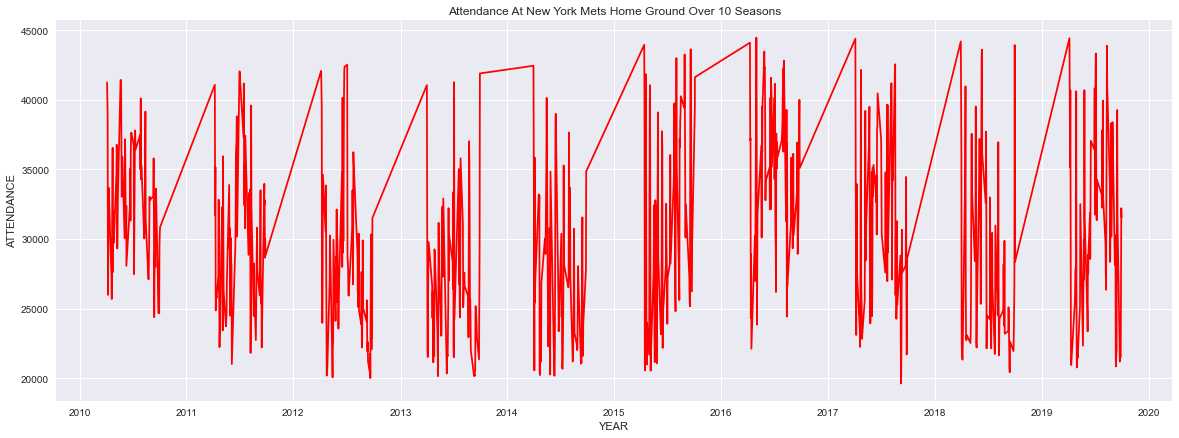

In [277]:
plt.figure(figsize=(20,7))
plt.plot(time_nym.index, time_nym, color = 'red')
plt.xlabel('YEAR')
plt.ylabel('ATTENDANCE')
plt.title('Attendance at New York Mets home ground over 10 seasons'.title())
plt.show()

In [269]:
time_nym.mean()

attendance   30038.20
dtype: float64

In [278]:
#perform dickey fuller to see if our data is stationary
from statsmodels.tsa.stattools import adfuller
test = adfuller(time_nym)
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                 -6.30
p-value                         0.00
#Lags Used                      6.00
Number of Observations Used   790.00
dtype: float64


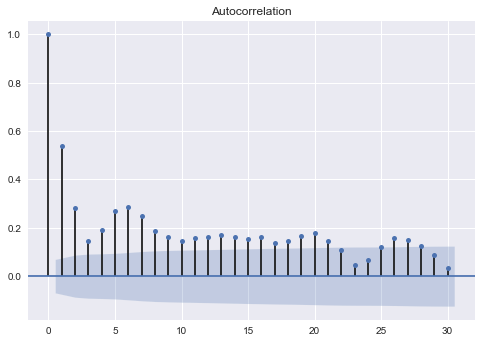

In [274]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(time_nym, alpha=.05); #plot autocorrelation for each lag (alpha is confidence interval)

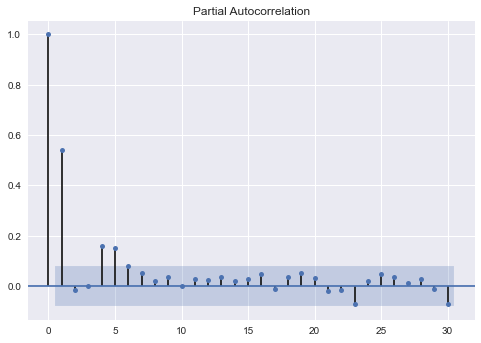

In [275]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(time_nym, alpha=.025, lags=30);